<a href="https://colab.research.google.com/github/asadyousuf-dare/Thesis-work/blob/main/ANN_tuned_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score, make_scorer

from sklearn.feature_selection import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score

import numpy as np
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)
from tensorflow.keras.layers import Embedding
from IPython.display import clear_output



%config InlineBackend.figure_format = 'retina'



plt.rcParams['figure.figsize']=[14,8]
import seaborn as sns

In [3]:
!pip install lrcurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 9.4 MB/s 


In [4]:
from lrcurve import KerasLearningCurve

In [5]:
df = pd.read_csv('/content/training.csv')

In [6]:
df_cv= pd.read_csv('testing.csv')

In [7]:
df

,fc20,fy20,cover,depth,area,MR
0,25.96875,255.025,0.02903,0.28332,0.000181,11689.63659
1,16.93375,100.675,0.06461,0.24388,0.000520,9303.37660
2,32.92375,918.775,0.02899,0.18692,0.000251,35656.31202
3,23.59625,537.175,0.05823,0.14756,0.000319,14677.00345
4,63.76625,506.125,0.05349,0.20852,0.000223,17429.70740
...,...,...,...,...,...,...
1995,45.04625,326.575,0.06181,0.26540,0.000534,35190.35028
1996,51.41625,340.525,0.05461,0.29724,0.000349,28731.34144
1997,73.61375,487.225,0.03665,0.27276,0.000134,15422.04741
1998,71.20875,660.925,0.04467,0.18876,0.000391,36791.43248


In [9]:
df.columns

Index(['fc20', 'fy20', 'cover', 'depth', 'area', 'MR'], dtype='object')

In [10]:
#Traing data seperation

In [12]:
# Separate Target Variable and Predictor Variables
TargetVariable=['MR']
Predictors=['fc20', 'fy20', 'cover', 'depth', 'area' ]

X_train=df[Predictors].values
y_train=df[TargetVariable].values
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X_train)
TargetVarScalerFit=TargetVarScaler.fit(y_train)
 
# Generating the standardized values of X and y
X_train=PredictorScalerFit.transform(X_train)
y_train=TargetVarScalerFit.transform(y_train)
 
# Split the data into training and validation set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Testing data seperation

In [14]:
TargetVariable=['MR']
Predictors=['fc20', 'fy20', 'cover', 'depth', 'area' ]

X_test=df_cv[Predictors].values
y_test=df_cv[TargetVariable].values
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X_test)
TargetVarScalerFit=TargetVarScaler.fit(y_test)
 
# Generating the standardized values of X and y
X_test=PredictorScalerFit.transform(X_test)
y_test=TargetVarScalerFit.transform(y_test)

In [15]:
#Traing data seperation

In [16]:
len(y_train)

2000

In [17]:
len(X_test)

400

In [18]:
optimizer = tensorflow.keras.optimizers.Adam(lr=0.01)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:

# Initialising the ANN
model = Sequential()
#model.add(Dropout(0.1, input_shape=(6,)))


# Adding the input layer and the first hidden layer
model.add(Dense(128, activation = 'relu',input_dim = 5))

model.add(Dense(512, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
# Adding the output layer

model.add(Dense(units = 1,activation='linear'))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = optimizer, loss = 'mean_squared_error',metrics=['mean_squared_error'])

# Fitting the ANN to the Training set
history=model.fit(X_train, y_train, batch_size = 32, epochs = 100,
                  validation_data=(X_test, y_test),
                  # validation_freq=10,
                   validation_split=0.2,
                    callbacks=[KerasLearningCurve()],
                  verbose=0,
                  
                 
                               )



In [21]:
history.history

{'loss': [0.17987783253192902,
  0.00669084070250392,
  0.0052944812923669815,
  0.003508508438244462,
  0.0032023328822106123,
  0.0022921529598534107,
  0.0027092581149190664,
  0.0023201152216643095,
  0.002273079939186573,
  0.0015203997027128935,
  0.0011468916200101376,
  0.0013250272022560239,
  0.001991475000977516,
  0.0013816696591675282,
  0.0018045061733573675,
  0.0017934259958565235,
  0.004450295120477676,
  0.005404253024607897,
  0.0032751956023275852,
  0.017869042232632637,
  0.012017471715807915,
  0.0023842360824346542,
  0.0008847450953908265,
  0.0007086816476657987,
  0.0005926821613684297,
  0.0004870813281740993,
  0.00034837343264371157,
  0.0003895022673532367,
  0.00175461545586586,
  0.003447147086262703,
  0.011756147257983685,
  0.004398788325488567,
  0.0016178844962269068,
  0.0010561164235696197,
  0.0012325076386332512,
  0.0010301221627742052,
  0.0008520239498466253,
  0.00039485073648393154,
  0.00042159564327448606,
  0.0004126402782276273,
  0.0

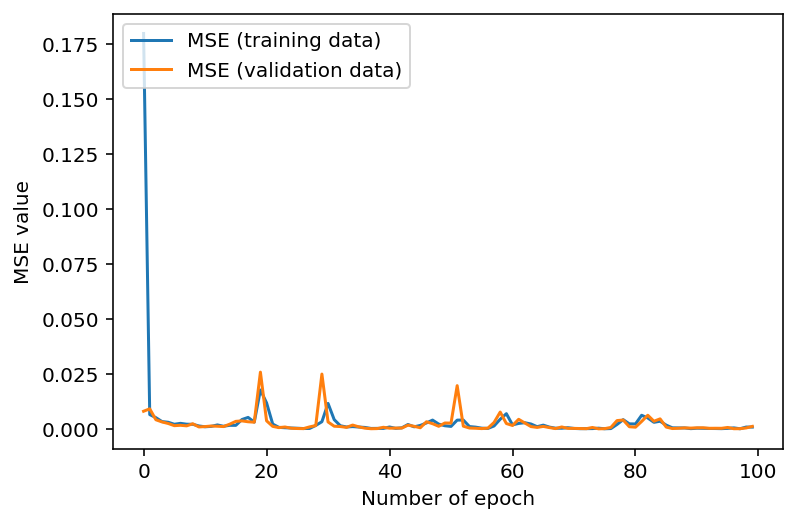

In [22]:
# Plot history: MSE
plt.plot(history.history['loss'], label='MSE (training data)')
plt.plot(history.history['val_loss'], label='MSE (validation data)')

plt.ylabel('MSE value')
plt.xlabel('Number of epoch')
plt.legend(loc="upper left")
plt.show()

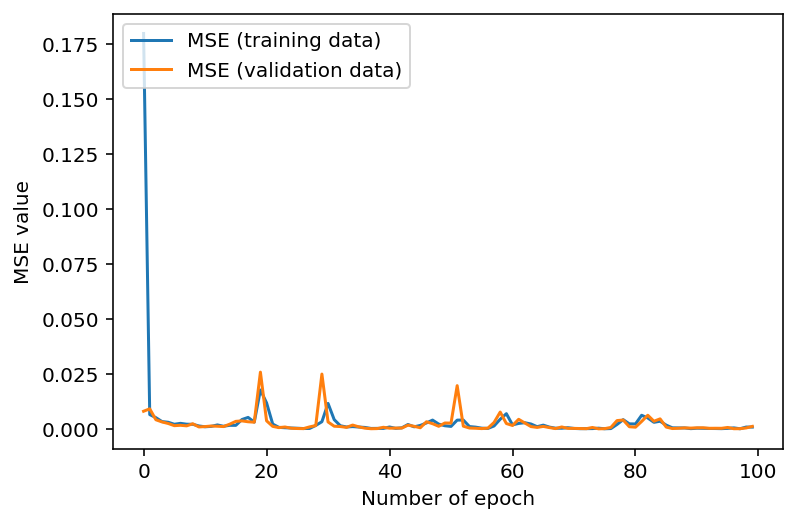

In [23]:
# Plot history: MSE
plt.plot(history.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (validation data)')

plt.ylabel('MSE value')
plt.xlabel('Number of epoch')
plt.legend(loc="upper left")
plt.show()

In [24]:
pd.DataFrame(history.history)

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,0.179878,0.179878,0.008202,0.008202
1,0.006691,0.006691,0.009306,0.009306
2,0.005294,0.005294,0.004336,0.004336
3,0.003509,0.003509,0.003346,0.003346
4,0.003202,0.003202,0.002645,0.002645
...,...,...,...,...
95,0.000429,0.000429,0.000834,0.000834
96,0.000648,0.000648,0.000262,0.000262
97,0.000254,0.000254,0.000282,0.000282
98,0.001029,0.001029,0.000614,0.000614


# PREDICT

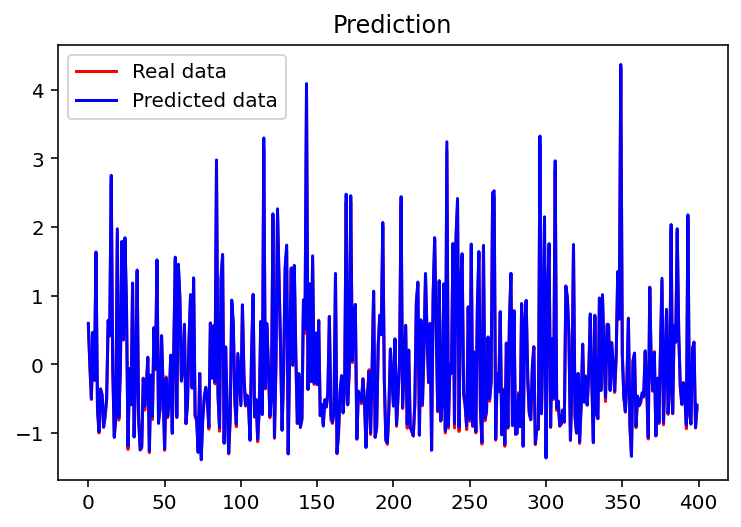

In [25]:
y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction') 

plt.legend()
plt.show()

In [26]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_pred, y_test))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.035


In [27]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(y_pred)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

In [29]:
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['orginal']=y_test_orig
TestingData['predicted']=Predictions
TestingData.head()

,fc20,fy20,cover,depth,area,orginal,predicted
0,22.88125,933.625,0.06555,0.1942,0.000380,42845.46508,43419.355469
1,22.39375,584.875,0.04995,0.2674,0.000238,29813.29277,30400.699219
2,23.04375,454.375,0.03245,0.2578,0.000191,19349.66856,19722.693359
3,43.19375,629.875,0.05475,0.1878,0.000494,40303.61806,40635.781250
4,39.94375,429.625,0.03865,0.1950,0.000383,25383.81762,25465.818359


In [30]:
mean_absolute_percentage_error(TestingData['orginal'],TestingData['predicted'])

3.029350122237542

In [31]:
from math import sqrt
rmse = sqrt(mean_squared_error(TestingData['predicted'], TestingData['orginal']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 753.217


In [32]:
from sklearn.metrics import r2_score
r_squared=r2_score(TestingData['orginal'], TestingData['predicted'])

In [33]:
r_squared

0.9987906052894775

In [34]:
Y_test=TestingData['orginal']
Y_pred=TestingData['predicted']

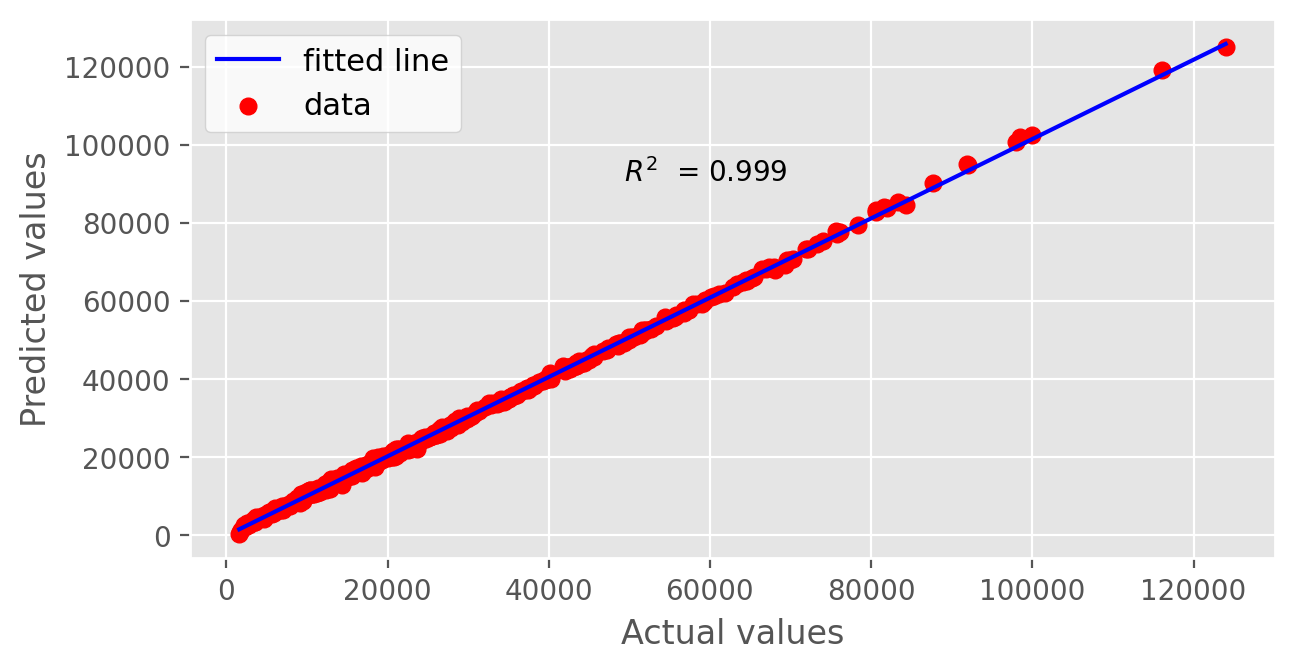

In [35]:
r_squared = r_squared

import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))


ax.scatter(Y_test,Y_pred,color='red',label='data')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, Y_pred, 1))(np.unique(Y_test)),color='blue',label='fitted line')
ax.text(0.4,0.7, "$R^2$  = %0.3f " % r_squared, transform=ax.transAxes)
  #     )
ax.legend(facecolor='white', fontsize=11)